In [1]:
import pandas as pd
import requests # pip install requests
import bs4 # pip install bs4
from bs4 import BeautifulSoup
from PIL import Image # pillow package (Python Image Library)
import io
import re

In [2]:
print(f'pandas version = {pd.__version__}')
print(f'bs4    version = {bs4.__version__}')

pandas version = 1.4.0
bs4    version = 4.10.0


In [3]:
pd.Timestamp.today()

Timestamp('2022-03-02 02:02:27.230150')

In [4]:
url = 'https://www.orientalprincess.com/%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B8%AB%E0%B8%AD%E0%B8%A1.html?product_list_limit=all'
r = requests.get(url)
r.text

'<!doctype html>\n<html lang="th">\n    <head >\n        <script>\n    var BASE_URL = \'https://www.orientalprincess.com/\';\n    var require = {\n        "baseUrl": "https://www.orientalprincess.com/pub/static/frontend/Sm/destino/th_TH"\n    };\n</script>\n        <meta charset="utf-8"/>\n<meta name="title" content="ความหอม"/>\n<meta name="robots" content="INDEX,FOLLOW"/>\n<meta name="viewport" content="width=device-width, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no"/>\n<meta name="format-detection" content="telephone=no"/>\n<meta name="facebook-domain-verification" content="yexnw9adi01rzetvil0rtqu3xcuxaq"/>\n<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n<title>ความหอม</title>\n<link  rel="stylesheet" type="text/css"  media="all" href="https://www.orientalprincess.com/pub/static/frontend/Sm/destino/th_TH/mage/calendar.css" />\n<link  rel="stylesheet" type="text/css"  media="all" href="https://www.orientalprincess.com/pub/static/frontend/Sm/destino/th_TH/css/styles

In [5]:
s = BeautifulSoup(r.text)
s

<!DOCTYPE html>
<html lang="th">
<head>
<script>
    var BASE_URL = 'https://www.orientalprincess.com/';
    var require = {
        "baseUrl": "https://www.orientalprincess.com/pub/static/frontend/Sm/destino/th_TH"
    };
</script>
<meta charset="utf-8"/>
<meta content="ความหอม" name="title"/>
<meta content="INDEX,FOLLOW" name="robots"/>
<meta content="width=device-width, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="yexnw9adi01rzetvil0rtqu3xcuxaq" name="facebook-domain-verification"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>ความหอม</title>
<link href="https://www.orientalprincess.com/pub/static/frontend/Sm/destino/th_TH/mage/calendar.css" media="all" rel="stylesheet" type="text/css"/>
<link href="https://www.orientalprincess.com/pub/static/frontend/Sm/destino/th_TH/css/styles-m.css" media="all" rel="stylesheet" type="text/css"/>
<link href="https://www.orientalprinc

In [6]:
r = s.select('li.item.product.product-item')
len(r)

95

In [7]:
a = r[0] # test 1
print(a.prettify)

<bound method Tag.prettify of <li class="item product product-item">
<div class="item-inner">
<div class="product-item-info" data-container="product-grid">
<div class="product-item-image">
<a class="product photo product-item-photo" href="https://www.orientalprincess.com/26488.html" tabindex="-1">
<span class="product-image-wrapper">
<img alt="Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml." class="product-image-photo default_image" src="https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-02_1.jpg"/>
</span>
</a>
<div class="actions-secondary" data-role="add-to-links">
<a class="action towishlist" data-action="add-to-wishlist" data-post='{"action":"https:\/\/www.orientalprincess.com\/wishlist\/index\/add\/","data":{"product":2609,"uenc":"aHR0cHM6Ly93d3cub3JpZW50YWxwcmluY2Vzcy5jb20vJUUwJUI4JTg0JUUwJUI4JUE3JUUwJUI4JUIyJUUwJUI4JUExJUUwJUI4JUFCJUUwJUI4JUFEJUUwJUI4JUExLmh0bWw_cHJvZHVjdF9saXN0X2xpbWl0P

In [8]:
c = r[94] # test 94
print(c.prettify)

<bound method Tag.prettify of <li class="item product product-item">
<div class="item-inner">
<div class="product-item-info" data-container="product-grid">
<div class="product-item-image">
<a class="product photo product-item-photo" href="https://www.orientalprincess.com/wonders-of-asia-thailand-perfume-body-serum.html" tabindex="-1">
<span class="product-image-wrapper">
<img alt="Wonders of Asia Thailand Perfume Body Serum" class="product-image-photo default_image" src="https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/t/h/tha-serum-1000.jpg"/>
</span>
</a>
<div class="actions-secondary" data-role="add-to-links">
<a class="action towishlist" data-action="add-to-wishlist" data-post='{"action":"https:\/\/www.orientalprincess.com\/wishlist\/index\/add\/","data":{"product":3556,"uenc":"aHR0cHM6Ly93d3cub3JpZW50YWxwcmluY2Vzcy5jb20vJUUwJUI4JTg0JUUwJUI4JUE3JUUwJUI4JUIyJUUwJUI4JUExJUUwJUI4JUFCJUUwJUI4JUFEJUUwJUI4JUExLmh0bWw_cHJvZHVjdF9saXN0X2xpbW

In [9]:
c.select_one('a.product-item-link')

<a class="product-item-link" href="https://www.orientalprincess.com/wonders-of-asia-thailand-perfume-body-serum.html">
											Wonders of Asia Thailand Perfume Body Serum										</a>

In [10]:
c.select_one('a.product-item-link').text

'\n\t\t\t\t\t\t\t\t\t\t\tWonders of Asia Thailand Perfume Body Serum\t\t\t\t\t\t\t\t\t\t'

In [11]:
c.select_one('a.product-item-link').text.strip()

'Wonders of Asia Thailand Perfume Body Serum'

In [12]:
Price = c.select_one('span.price-wrapper').text.strip()
Price

'฿75.00'

In [13]:
float(re.sub(r'฿', '', Price))

75.0

In [14]:
c.select_one('div.wp-product-label.catalog-list-label').text.strip() if c.select_one('div.wp-product-label.catalog-list-label') else None

In [15]:
c.select_one('div.rating-result').text.strip() if c.select_one('div.rating-result') else None

In [16]:
c.select_one('div.product-label.new-label').text.strip() if c.select_one('div.product-label.new-label') else None

In [17]:
c.select_one('img')

<img alt="Wonders of Asia Thailand Perfume Body Serum" class="product-image-photo default_image" src="https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/t/h/tha-serum-1000.jpg"/>

In [18]:
c.select_one('img')['alt']

'Wonders of Asia Thailand Perfume Body Serum'

In [19]:
c.select_one('img')['src']

'https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/t/h/tha-serum-1000.jpg'

In [20]:
c.select_one('a')['href']

'https://www.orientalprincess.com/wonders-of-asia-thailand-perfume-body-serum.html'

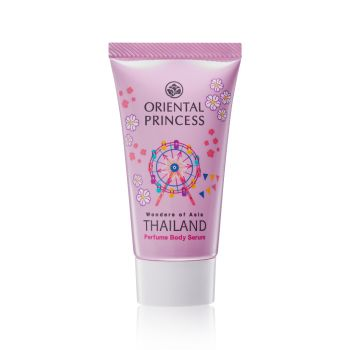

In [21]:
z = requests.get(c.select_one('img')['src'])
image = Image.open(io.BytesIO(z.content))
image

In [22]:
Products = []
for c in r[:]:
    Name = c.select_one('a.product-item-link').text.strip()
    Price = c.select_one('span.price-wrapper').text.strip()
    Price_Products = float(re.sub(r'฿', '', Price))
    Promotion = c.select_one('div.wp-product-label.catalog-list-label').text.strip() if c.select_one('div.wp-product-label.catalog-list-label') else None
    Rating_star = c.select_one('div.rating-result').text.strip() if c.select_one('div.rating-result') else None
    Status = c.select_one('div.product-label.new-label').text.strip() if c.select_one('div.product-label.new-label') else None
    Pic_name = c.select_one('img')['alt']
    Pic = c.select_one('img')['src']
    Pic_link = c.select_one('a')['href']
    Products.append([Name, Price_Products, Promotion, Rating_star, Status, Pic_name, Pic, Pic_link])
Products

[['Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.',
  355.0,
  None,
  None,
  None,
  'Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.',
  'https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-02_1.jpg',
  'https://www.orientalprincess.com/26488.html'],
 ['Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.',
  195.0,
  'BUY 1 GET 1',
  None,
  None,
  'Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.',
  'https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-02_1.jpg',
  'https://www.orientalprincess.com/26953.html'],
 ['Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.',
  355.0,
  None,
  None,
  None,
  'Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.',
  'https://www.orientalprincess.c

In [23]:
pd.options.display.max_colwidth = 0

In [24]:
pd.DataFrame(Products)

,0,1,2,3,4,5,6,7
0,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-02_1.jpg,https://www.orientalprincess.com/26488.html
1,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-02_1.jpg,https://www.orientalprincess.com/26953.html
2,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-04_1.jpg,https://www.orientalprincess.com/charisma the art of fragrance layering garden wonderland eau de toilette 30 ml.html
3,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-05_1.jpg,https://www.orientalprincess.com/26951.html
4,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-03_1.jpg,https://www.orientalprincess.com/26487.html
...,...,...,...,...,...,...,...,...
90,Story of Happiness Wonder Berry Body Cologne Spray,175.0,None,None,None,Story of Happiness Wonder Berry Body Cologne Spray,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/w/o/wonder-berry-body.jpg,https://www.orientalprincess.com/hair-cologne-oriental-white-flower-7763.html
91,Story of Happiness Wonder Berry Hair Cologne Spray,145.0,None,None,None,Story of Happiness Wonder Berry Hair Cologne Spray,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/w/o/wonder-berry-hair.jpg,https://www.orientalprincess.com/hair-cologne-oriental-white-flower-8142.html
92,Wonders of Asia China Perfume Body Serum,75.0,None,None,None,Wonders of Asia China Perfume Body Serum,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/china-serum-1000.jpg,https://www.orientalprincess.com/wonders-of-asia-china-perfume-body-serum-1.html
93,Wonders of Asia Korea Perfume Body Serum,75.0,None,None,None,Wonders of Asia Korea Perfume Body Serum,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/k/o/kor-serum-1000.jpg,https://www.orientalprincess.com/wonders-of-asia-korea-perfume-body-serum-2.html


In [25]:
df = pd.DataFrame(Products, columns=['Name', 'Price_Products', 'Promotion', 'Rating_star', 'Status', 'Pic_name', 'Pic', 'Pic_link'])
df

,Name,Price_Products,Promotion,Rating_star,Status,Pic_name,Pic,Pic_link
0,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-02_1.jpg,https://www.orientalprincess.com/26488.html
1,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-02_1.jpg,https://www.orientalprincess.com/26953.html
2,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-04_1.jpg,https://www.orientalprincess.com/charisma the art of fragrance layering garden wonderland eau de toilette 30 ml.html
3,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-05_1.jpg,https://www.orientalprincess.com/26951.html
4,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-03_1.jpg,https://www.orientalprincess.com/26487.html
...,...,...,...,...,...,...,...,...
90,Story of Happiness Wonder Berry Body Cologne Spray,175.0,None,None,None,Story of Happiness Wonder Berry Body Cologne Spray,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/w/o/wonder-berry-body.jpg,https://www.orientalprincess.com/hair-cologne-oriental-white-flower-7763.html
91,Story of Happiness Wonder Berry Hair Cologne Spray,145.0,None,None,None,Story of Happiness Wonder Berry Hair Cologne Spray,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/w/o/wonder-berry-hair.jpg,https://www.orientalprincess.com/hair-cologne-oriental-white-flower-8142.html
92,Wonders of Asia China Perfume Body Serum,75.0,None,None,None,Wonders of Asia China Perfume Body Serum,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/china-serum-1000.jpg,https://www.orientalprincess.com/wonders-of-asia-china-perfume-body-serum-1.html
93,Wonders of Asia Korea Perfume Body Serum,75.0,None,None,None,Wonders of Asia Korea Perfume Body Serum,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/k/o/kor-serum-1000.jpg,https://www.orientalprincess.com/wonders-of-asia-korea-perfume-body-serum-2.html


In [35]:
from IPython.display import HTML

In [36]:
def to_html_img(url, alt = None, width = 200):
    if alt == None:
        alt = ''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

In [37]:
to_html_img('https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/t/h/tha-serum-1000.jpg')

'<img alt="" src="https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/t/h/tha-serum-1000.jpg" width="200"/>'

In [38]:
df['Pic_orental']= df.apply(lambda r: to_html_img(r['Pic'], r['Pic_name'], 200), axis=1)
df.head()

,Name,Price_Products,Promotion,Rating_star,Status,Pic_name,Pic,Pic_link,Pic_orental,a
0,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-02_1.jpg,https://www.orientalprincess.com/26488.html,"<img alt=""Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-02_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/26488.html"">Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.</a>"
1,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-02_1.jpg,https://www.orientalprincess.com/26953.html,"<img alt=""Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-02_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/26953.html"">Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.</a>"
2,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-04_1.jpg,https://www.orientalprincess.com/charisma the art of fragrance layering garden wonderland eau de toilette 30 ml.html,"<img alt=""Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-04_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/charisma the art of fragrance layering garden wonderland eau de toilette 30 ml.html"">Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.</a>"
3,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-05_1.jpg,https://www.orientalprincess.com/26951.html,"<img alt=""Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-05_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/26951.html"">Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.</a>"
4,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-03_1.jpg,https://www.orientalprincess.com/26487.html,"<img alt=""Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-03_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/26487.html"">Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.</a>"


In [40]:
def to_html_link(url, text):
    if text == None:
        text = ''
    return f'<a href = "{url}">{text}</a>'

In [41]:
to_html_link('https://www.orientalprincess.com/26487.html', '<img alt="Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml." src="https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-03_1.jpg width="200">')

'<a href = "https://www.orientalprincess.com/26487.html"><img alt="Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml." src="https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-03_1.jpg width="200"></a>'

In [42]:
df['a'] = df.apply(lambda r: to_html_link(r['Pic_link'], r['Pic_name']), axis = 1)
df.head()

,Name,Price_Products,Promotion,Rating_star,Status,Pic_name,Pic,Pic_link,Pic_orental,a
0,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-02_1.jpg,https://www.orientalprincess.com/26488.html,"<img alt=""Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-02_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/26488.html"">Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.</a>"
1,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-02_1.jpg,https://www.orientalprincess.com/26953.html,"<img alt=""Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-02_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/26953.html"">Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.</a>"
2,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-04_1.jpg,https://www.orientalprincess.com/charisma the art of fragrance layering garden wonderland eau de toilette 30 ml.html,"<img alt=""Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-04_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/charisma the art of fragrance layering garden wonderland eau de toilette 30 ml.html"">Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.</a>"
3,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-05_1.jpg,https://www.orientalprincess.com/26951.html,"<img alt=""Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charisma8.5-05_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/26951.html"">Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.</a>"
4,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,355.0,None,None,None,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-03_1.jpg,https://www.orientalprincess.com/26487.html,"<img alt=""Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml."" src=""https://www.orientalprincess.com/pub/media/catalog/product/cache/88881c5b2d41db45f7bdd36dbd8fb5cc/c/h/charis30ml-03_1.jpg"" width=""200""/>","<a href = ""https://www.orientalprincess.com/26487.html"">Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.</a>"


In [43]:
HTML(df[['Name', 'Price_Products', 'Promotion', 'Rating_star', 'Status', 'Pic_orental', 'a']].to_html(escape=False))

,Name,Price_Products,Promotion,Rating_star,Status,Pic_orental,a
0,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.,355.0,None,None,None,,Charisma The Art Of Fragrance Layering Floral Paradise Eau De Toilette 30 ml.
1,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,,Charisma The Art Of Fragrance Layering Floral Paradise Eau de Toilette 8.5 ml.
2,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.,355.0,None,None,None,,Charisma The Art Of Fragrance Layering Garden Wonderland Eau De Toilette 30 ml.
3,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,,Charisma The Art Of Fragrance Layering Garden Wonderland Eau de Toilette 8.5 ml.
4,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.,355.0,None,None,None,,Charisma The Art Of Fragrance Layering Lovely Fruity Eau De Toilette 30 ml.
5,Charisma The Art Of Fragrance Layering Lovely Fruity Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,,Charisma The Art Of Fragrance Layering Lovely Fruity Eau de Toilette 8.5 ml.
6,Charisma The Art Of Fragrance Layering Summer Citrus Eau De Toilette 30 ml.,355.0,None,None,None,,Charisma The Art Of Fragrance Layering Summer Citrus Eau De Toilette 30 ml.
7,Charisma The Art Of Fragrance Layering Summer Citrus Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,,Charisma The Art Of Fragrance Layering Summer Citrus Eau de Toilette 8.5 ml.
8,Charisma The Art Of Fragrance Layering Sweet Angel Eau de Toilette 30 ml.,355.0,None,None,None,,Charisma The Art Of Fragrance Layering Sweet Angel Eau de Toilette 30 ml.
9,Charisma The Art Of Fragrance Layering Sweet Angel Eau de Toilette 8.5 ml.,195.0,BUY 1 GET 1,None,None,,Charisma The Art Of Fragrance Layering Sweet Angel Eau de Toilette 8.5 ml.
